# Convolutional Networks with Keras and tensorflow:

### In this particular Notebooks we are gonna improve our Performance for the Fashion MNIST dataset, using the Convolutional networks. Let's See how are they build:

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
## Loading Data:-----

mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Preprocessing the data before feeding it into the conv nets: ---------
## New Line added from previous:
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

## Creating the Conv net model: ---------

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation= 'softmax')
])

## Compiling the model 

model.compile(optimizer = 'adam', loss= "sparse_categorical_crossentropy")

model.summary()
model.fit(train_images, train_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)




4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)    

In [ ]:
print(f"The test accuracy is: {(1-test_loss)*100:.4f}")

The test accuracy is: 72.8542


## Visualizing the Convolutions and Pooling:

this code will show is the concolutions graphically. The print( test_labels[:100]) shows is the first 100 labels in the test set, and you can see that the ones at the index 0, indx 23 and index 28 are all the same value ( 9 ). They-re all shoes.

Lets look at the result of running the convolution on each, and you'll begin to see common features between them emerge.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


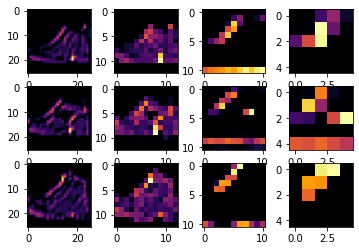

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONV_NUMBER = 20

layers_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layers_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONV_NUMBER], cmap = 'inferno')
  axarr[0,x].grid(False) 

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONV_NUMBER], cmap = 'inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONV_NUMBER], cmap = 'inferno')
  axarr[2,x].grid(False)

## Let's See how convolutions work:

#### By creating a basic convolution on a 2D grey scale image. First we can load the image by taking the 'ascent' image from scipy. It;s a nice, built-in picture withlots of angles and lines

In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

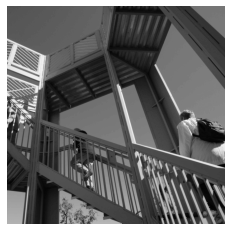

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

#### The image is stored as a numpy array, so we can create the transformed image by copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [4]:
i_trans = np.copy(i)
size_x = i_trans.shape[0]
size_y = i_trans.shape[1]

#### Now we can create a filter as an 3x3 array.

In [18]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines

filter = [[-1,0,-1],[0,5,0],[-1,0,-1]]   #My filter

#filter = [[0,1,0],[1,-4,1],[0,1,0]]

#filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
#filter = [[-1,0,1],[-2,0,2],[-1,0,1]]

## NOTE: 
# If all the digits in the filter don't add up to 0 or 1, you should
# probably do a weight toge tit to do so. so, for example, if the weights are:
# 1,1,1,1,2,1,1,1,1 = 10, then you would set the weight of 0.1 to normalize
# them
weight = 1

Now lets create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply by the value defined ini the filter.

i.e The current pixel's neightbor above it and to the left will be multiplied by the top left item in the filter etc.etc. we'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [19]:
for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x-1,y-1]*filter[0][0])
    convolution = convolution + (i[x,y-1]*filter[0][1])
    convolution = convolution + (i[x+1,y-1]*filter[0][2])
    convolution = convolution + (i[x-1,y]*filter[1][0])
    convolution = convolution + (i[x, y]*filter[1][1])
    convolution = convolution + (i[x+1, y]*filter[1][2])
    convolution = convolution + (i[x-1,y+1]*filter[2][0])
    convolution = convolution + (i[x, y+1]*filter[2][1]) 
    convolution = convolution + (i[x+1,y+1]*filter[2][2])
    convolution *= weight
    if (convolution > 255):
      convolution = 255
    if (convolution<0):
      convolution = 0
    i_trans[x,y] = convolution


Now we can plot the image to see the effect of the convolution!

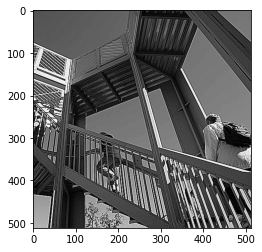

In [20]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_trans)
plt.show()

Applying the Pooling here:

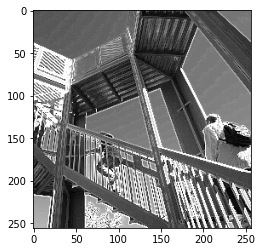

In [21]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_trans[x, y])
    pixels.append(i_trans[x+1, y])
    pixels.append(i_trans[x,y+1])
    pixels.append(i_trans[x+1,y+1])
    newImage[int(x/2), int(y/2)] = max(pixels)

#plot the image

plt.grid(False)
plt.gray()
plt.imshow(newImage)
plt.show()